In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import os
import pandas as pd
from dw_events.data.make_dataset import DataGetter
from dw_events.data.utils import make_dt_list, get_dataframe_str_subset
import datetime
import matplotlib.pyplot as plt

In [17]:
start = datetime.datetime(2022, 11, 17)
end = datetime.datetime(2022, 11, 21)

datagetter = DataGetter(start, end)

data_path = \
    "_".join(
        [
            "../data/raw/strain_data",
            str(start.year),
            str(start.month),
            str(start.day),
            str(end.year),
            str(end.month),
            str(end.day),
            ".parquet"
        ]
    )

try:
    strain_data = pd.read_parquet(data_path)
except FileNotFoundError:
    strain_data = datagetter.get_strain_data()
    strain_data.to_parquet(data_path)

In [36]:
strain_data.columns

Index(['SCB_ALM_WN_FBG_HOR001_45_nr1', 'SCB_ALM_WN_FBG_HOR001_45_nr2',
       'SCB_ALM_WN_FBG_HOR003_45_nr3', 'SCB_ALM_WN_FBG_HOR005_45_nr4',
       'SCB_ALM_WN_FBG_HOR007_45_nr5', 'SCB_ALM_WN_FBG_HOR009_min45_nr6',
       'SCB_ALM_WN_FBG_HOR011_min45_nr7', 'SCB_ALM_WN_FBG_HOR013_min45_nr8',
       'SCB_ALM_WN_FBG_HOR015_min45_nr9', 'SCB_ALM_WN_FBG_HOR015_min45_nr10',
       'SCB_ALM_TN_FBG_HOR003_0_nr1', 'SCB_ALM_TN_FBG_HOR005_0_nr2',
       'SCB_ALM_TN_FBG_HOR007_0_nr3', 'SCB_ALM_TN_FBG_HOR009_0_nr4',
       'SCB_ALM_TN_FBG_HOR011_0_nr5', 'SCB_ALM_TN_FBG_HOR013_0_nr6',
       'SCB_ALM_TCN_FBG_HOR003_0_nr1', 'SCB_ALM_TCN_FBG_HOR005_0_nr2',
       'SCB_ALM_TCN_FBG_HOR007_0_nr3', 'SCB_ALM_TCN_FBG_HOR009_0_nr4',
       'SCB_ALM_TCN_FBG_HOR011_0_nr5', 'SCB_ALM_TCN_FBG_HOR013_0_nr6',
       'SCB_ALM_WN_TFBG_HOR002', 'SCB_ALM_TCS_FBG_HOR003_0_nr1',
       'SCB_ALM_TCS_FBG_HOR005_0_nr2', 'SCB_ALM_TCS_FBG_HOR007_0_nr3',
       'SCB_ALM_TCS_FBG_HOR009_0_nr4', 'SCB_ALM_TCS_FBG_HOR011_0_nr5',
  

In [51]:
temperature_strain_data = get_dataframe_str_subset(strain_data, "TFBG")
top_temperature_strain_data = get_dataframe_str_subset(temperature_strain_data, "_TC")
bottom_temperature_strain_data = get_dataframe_str_subset(temperature_strain_data, "_B")
tn_strain_data = get_dataframe_str_subset(strain_data, "TN_FBG")
tcn_strain_data = get_dataframe_str_subset(strain_data, "TCN_FBG")
tcs_strain_data = get_dataframe_str_subset(strain_data, "TCS_FBG")
bcn_strain_data = get_dataframe_str_subset(strain_data, "BCN_FBG")
bcs_strain_data = get_dataframe_str_subset(strain_data, "BCS_FBG")

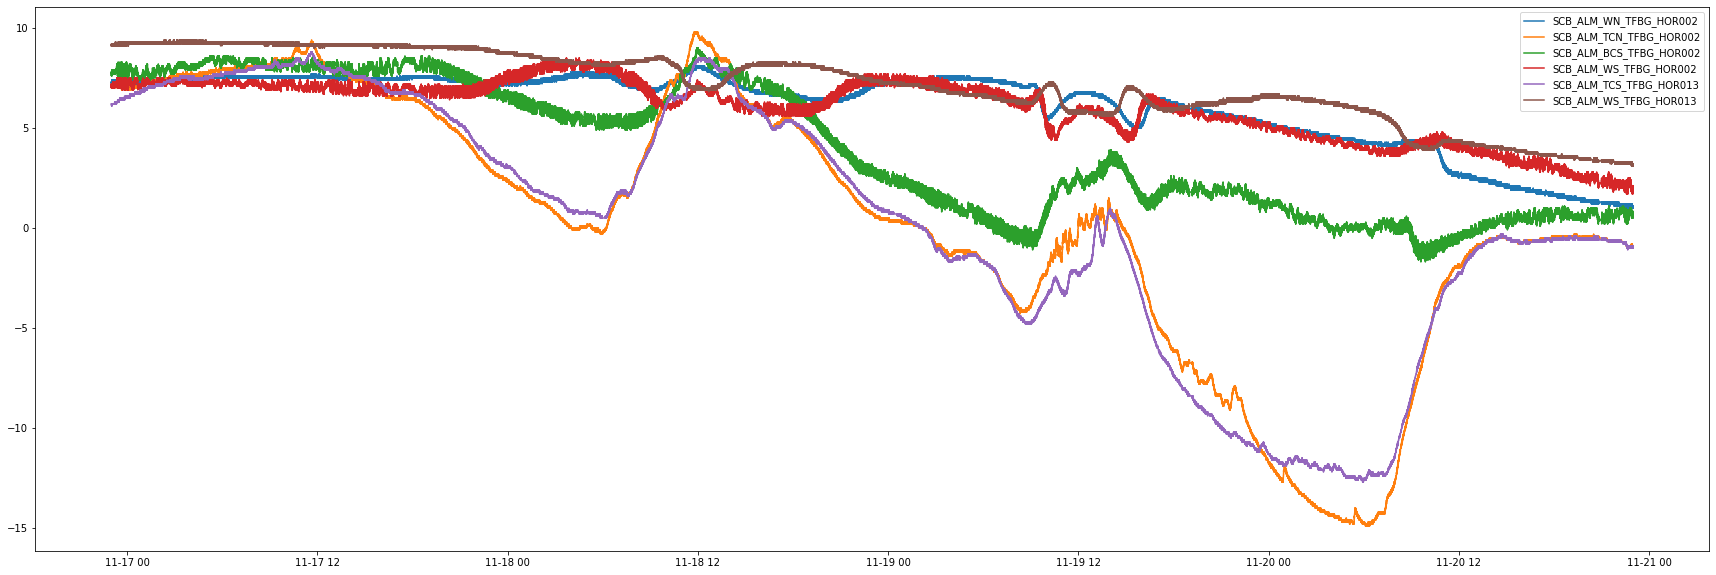

In [32]:
plt.figure(figsize=(30, 10))
plt.plot(temperature_strain_data)
plt.legend(temperature_strain_data.columns)
plt.show()

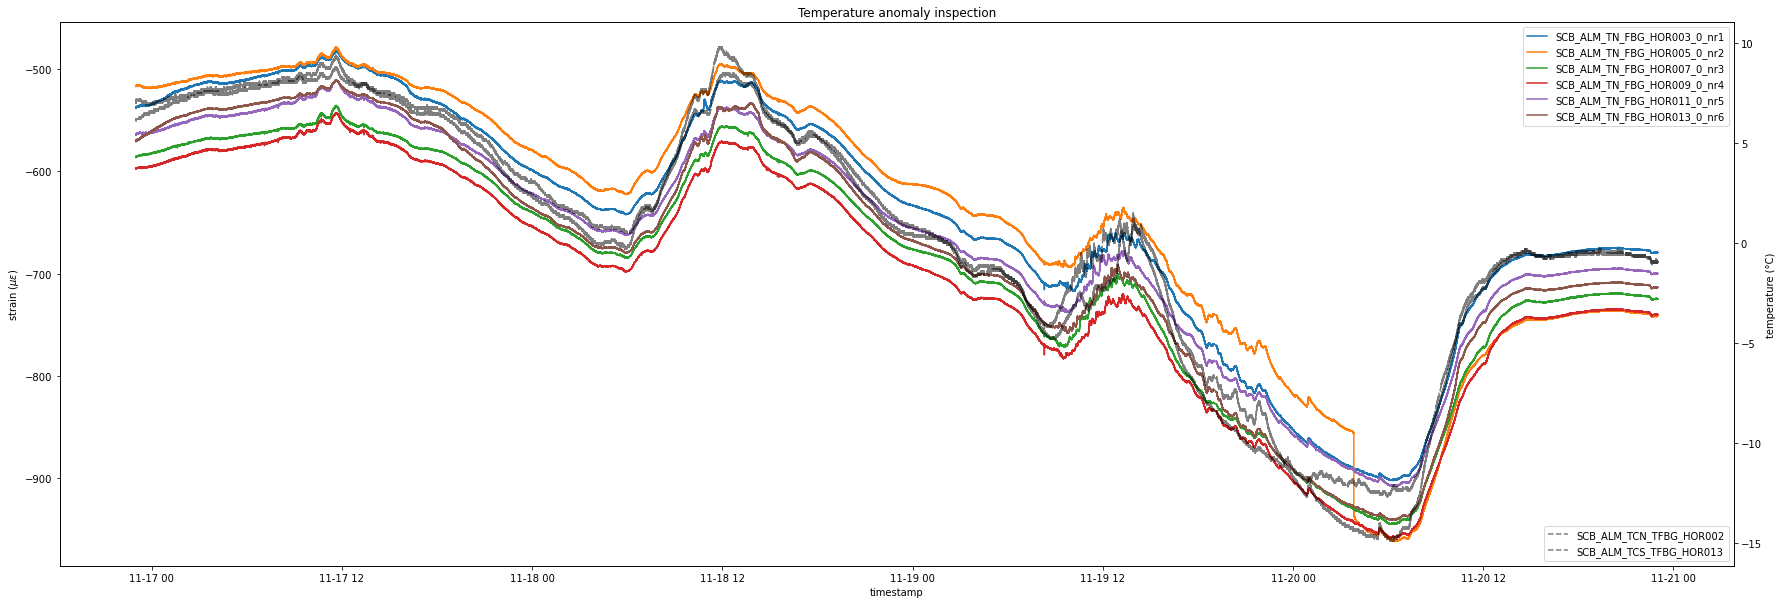

In [52]:
# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(30, 10))

# plot the first data series on the left y axis
ax1.plot(tn_strain_data)
ax1.set_xlabel('timestamp')
ax1.set_ylabel('strain ($\mu\epsilon$)')
ax1.legend(tn_strain_data.columns)

# create a second y axis on the right side
ax2 = ax1.twinx()

# plot the second data series on the right y axis
ax2.plot(top_temperature_strain_data, color='black', linestyle='--', alpha=0.5)
ax2.set_ylabel('temperature (°C)')
ax2.legend(top_temperature_strain_data.columns, loc='lower right')

# add a title and show the plot
ax1.set_title('Temperature anomaly inspection')
plt.show()

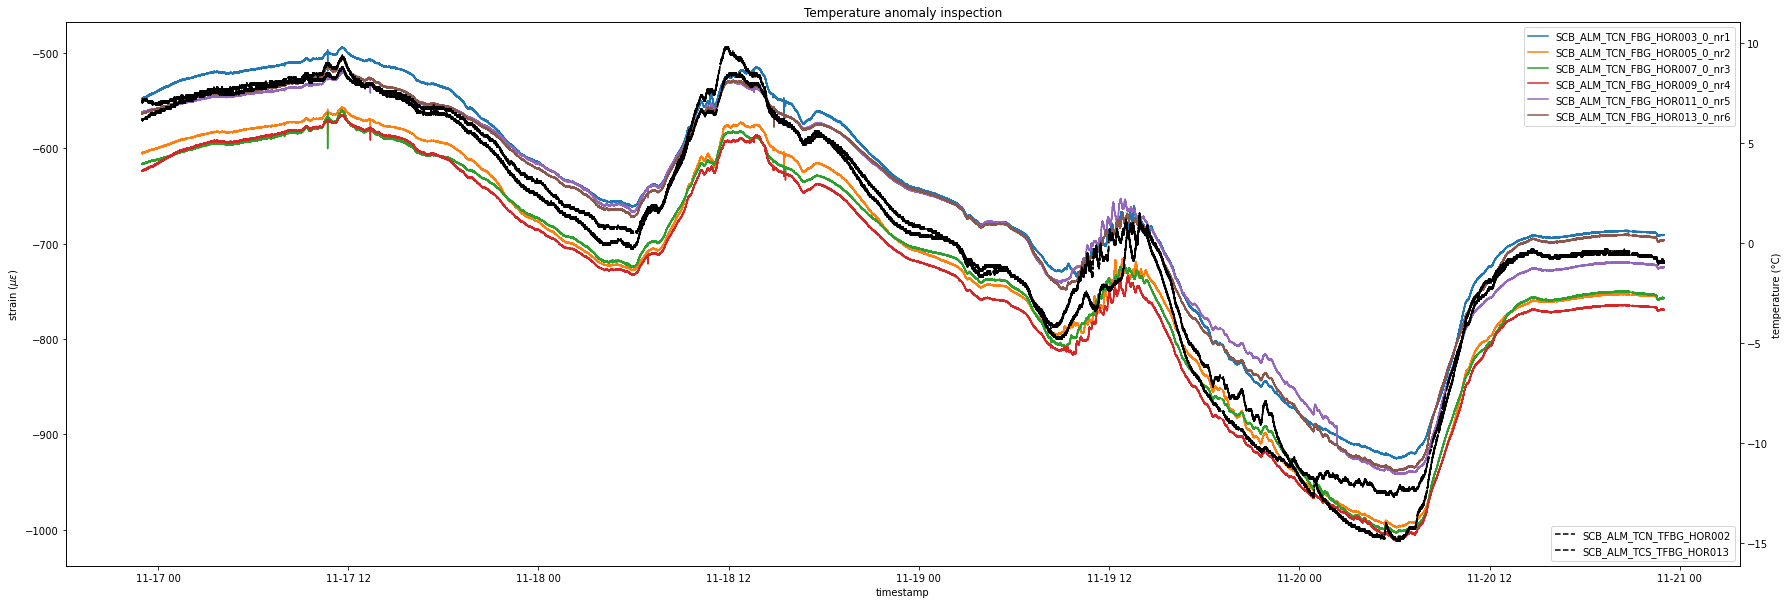

In [47]:
# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(30, 10))

# plot the first data series on the left y axis
ax1.plot(tcn_strain_data)
ax1.set_xlabel('timestamp')
ax1.set_ylabel('strain ($\mu\epsilon$)')
ax1.legend(tcn_strain_data.columns)

# create a second y axis on the right side
ax2 = ax1.twinx()

# plot the second data series on the right y axis
ax2.plot(top_temperature_strain_data, color='black', linestyle='--', alpha=0.5)
ax2.set_ylabel('temperature (°C)')
ax2.legend(top_temperature_strain_data.columns, loc='lower right')

# add a title and show the plot
ax1.set_title('Temperature anomaly inspection')
plt.show()

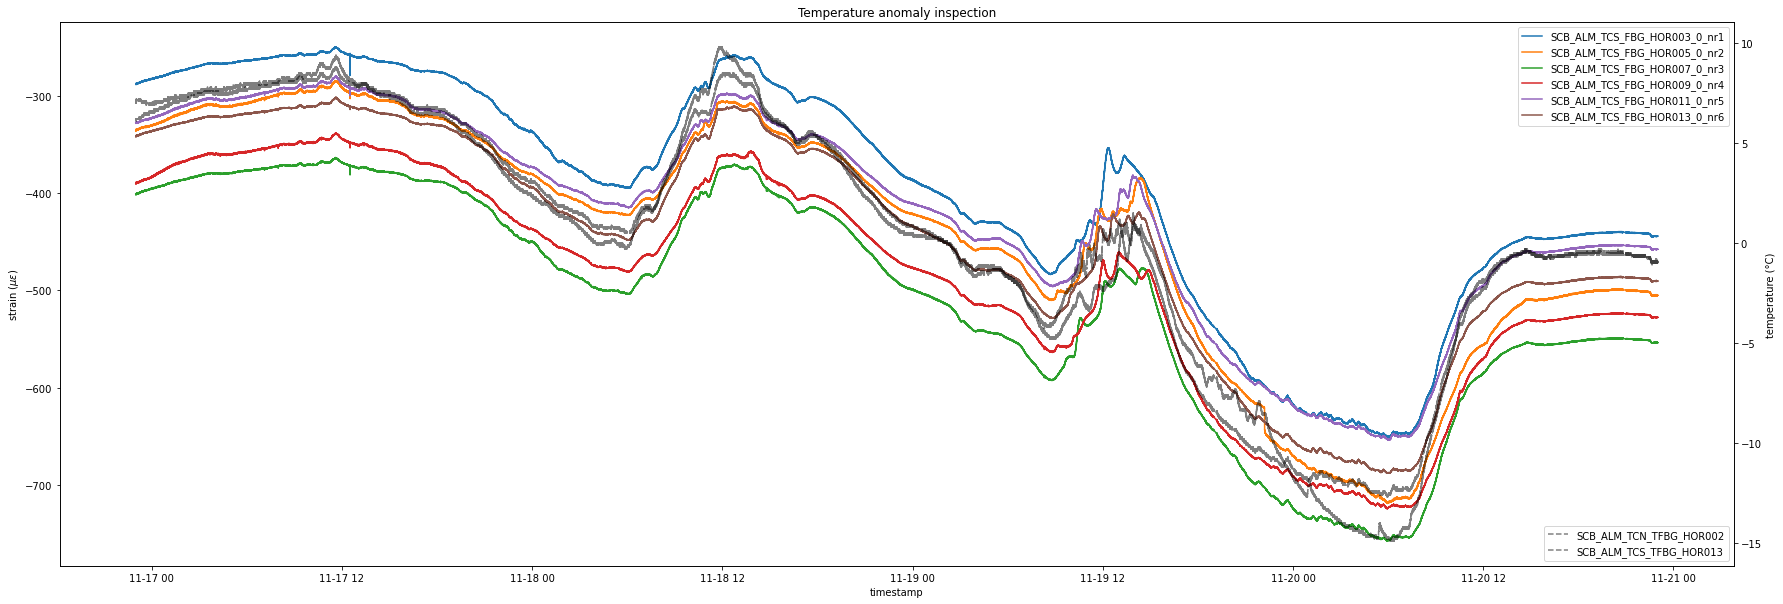

In [48]:
# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(30, 10))

# plot the first data series on the left y axis
ax1.plot(tcs_strain_data)
ax1.set_xlabel('timestamp')
ax1.set_ylabel('strain ($\mu\epsilon$)')
ax1.legend(tcs_strain_data.columns)


# create a second y axis on the right side
ax2 = ax1.twinx()

# plot the second data series on the right y axis
ax2.plot(top_temperature_strain_data, color='black', linestyle='--', alpha=0.5)
ax2.set_ylabel('temperature (°C)')
ax2.legend(top_temperature_strain_data.columns, loc='lower right')

# add a title and show the plot
ax1.set_title('Temperature anomaly inspection')
plt.show()

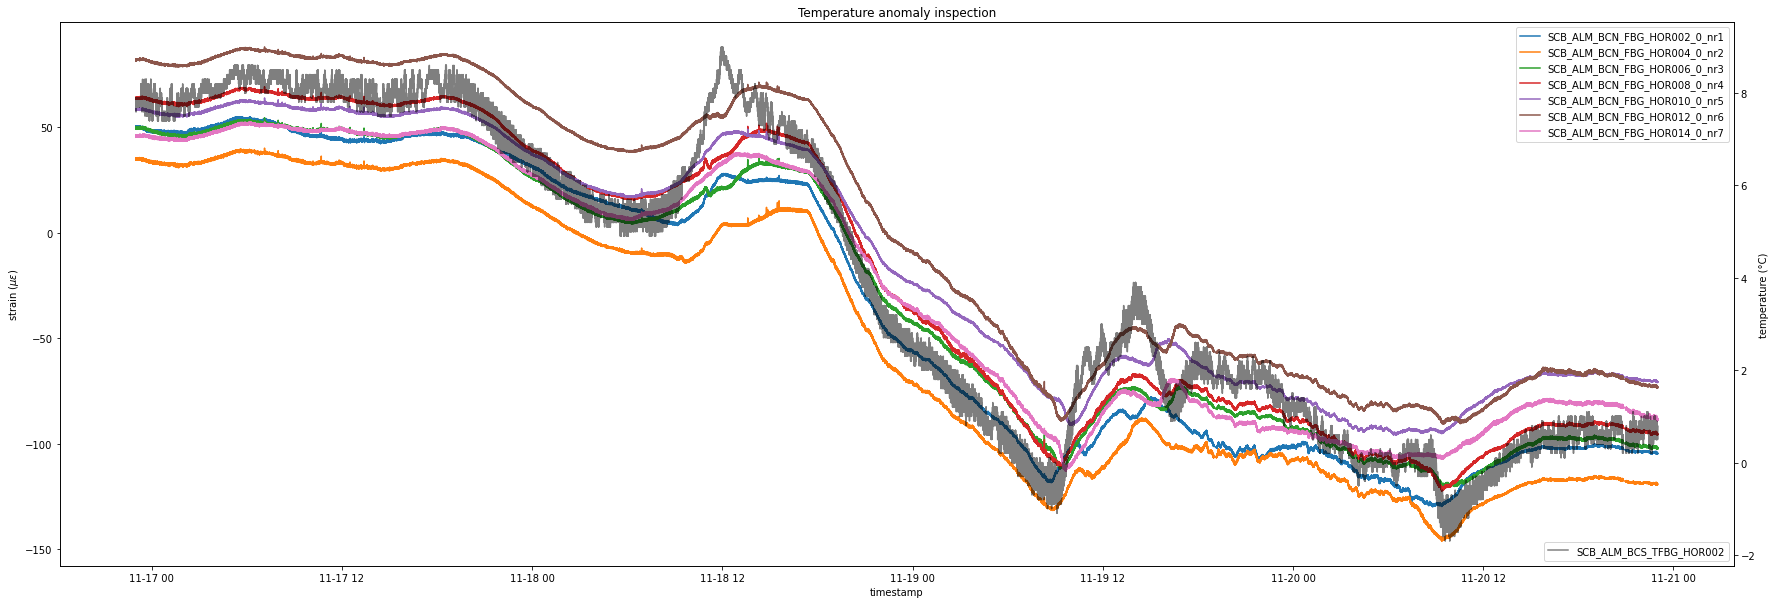

In [50]:
# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(30, 10))

# plot the first data series on the left y axis
ax1.plot(bcn_strain_data)
ax1.set_xlabel('timestamp')
ax1.set_ylabel('strain ($\mu\epsilon$)')
ax1.legend(bcn_strain_data.columns)

# create a second y axis on the right side
ax2 = ax1.twinx()

# plot the second data series on the right y axis
ax2.plot(bottom_temperature_strain_data, color='black', alpha = 0.5)
ax2.set_ylabel('temperature (°C)')
ax2.legend(bottom_temperature_strain_data.columns, loc='lower right')

# add a title and show the plot
ax1.set_title('Temperature anomaly inspection')
plt.show()

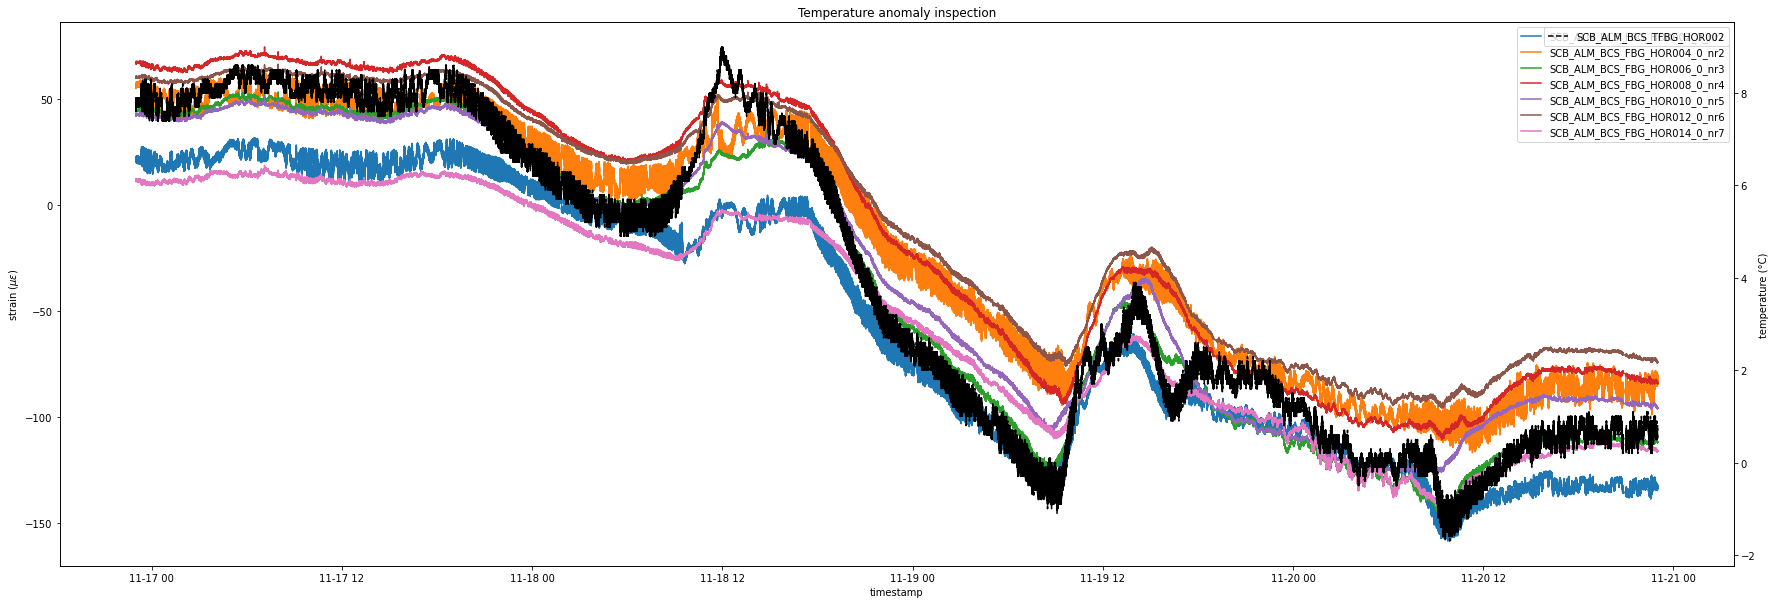

In [46]:
# create a figure and axis object
fig, ax1 = plt.subplots(figsize=(30, 10))

# plot the first data series on the left y axis
ax1.plot(bcs_strain_data)
ax1.set_xlabel('timestamp')
ax1.set_ylabel('strain ($\mu\epsilon$)')
ax1.legend(bcs_strain_data.columns)

# create a second y axis on the right side
ax2 = ax1.twinx()

# plot the second data series on the right y axis
ax2.plot(bottom_temperature_strain_data, color='black', linestyle='--', alpha = 0.5)
ax2.set_ylabel('temperature (°C)')
ax2.legend(bottom_temperature_strain_data.columns, loc='lower right')

# add a title and show the plot
ax1.set_title('Temperature anomaly inspection')
plt.show()